In [ ]:
# Important Libraries
import pandas as pd
import tensorflow as tf
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import cv2

from PIL import Image
import os
from pathlib import Path

from keras.models import Model
from keras.models import Sequential
from keras.layers import Input, Activation, merge, Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D

from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization 
from keras import optimizers

In [5]:
#!pip install kagglehub

In [747]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("alessiocorrado99/animals10")

print("Path to dataset files:", path)

Path to dataset files: /Users/dastas/.cache/kagglehub/datasets/alessiocorrado99/animals10/versions/2


In [293]:
# Path to the folder containing images
file_path = '../images'  # Replace with the path to your dataset
image_size = (128, 128)

In [376]:
# Generate dataframe
image_df = convert_imginfo_to_df(file_path)

# Print label counts
print(image_df['label'].value_counts())

# Load images
images = get_images(image_df)

# Output dimensions of images array
print(f"\nLoaded {len(images)} images with shape {images[0].shape}")

label
cane                  4863
ragno                 4821
gallina               3098
cavallo               2623
farfalla              2112
mucca                 1866
scoiattolo            1862
pecora                1820
gatto                 1668
elefante              1446
.ipynb_checkpoints       1
Name: count, dtype: int64

Loaded 26180 images with shape (128, 128, 3)


In [738]:
import os
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split 
from sklearn.model_selection import train_test_split
import numpy as np

# Batch size
batch_size = 12

# Transformaciones para las imágenes
transform = transforms.Compose([
    transforms.Resize((128, 128)),  # Redimensionar a 128x128
    transforms.ToTensor(),         # Convertir a tensor
    transforms.Lambda(lambda x: x.permute(1, 2, 0))  # Cambiar de (C, H, W) a (H, W, C) - To use directly in the model
])

# Carga del dataset completo
full_dataset = datasets.ImageFolder(root=file_path, transform=transform)

# Dividir en conjuntos de entrenamiento (68%), validación (17%), y prueba (15%)
total_size = len(full_dataset)
val_size = int(0.15 * total_size)
train_size = total_size - val_size

train_dataset, val_dataset = random_split(full_dataset, [train_size, val_size])

# Convert the subsets into DataLoaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# Outputs for validation
print(f"Total number of images: {len(full_dataset)}")
data_imgs, data_labels = full_dataset[0]
print(f"DataSet Shapes: {data_imgs.shape}")

print(f"\nTraining set size: {len(train_dataset)}")
print(f"Validation set size: {len(val_dataset)}")

# Verify that all classes are included in each set
train_classes = [targets[i] for i in train_idx]
val_classes = [targets[i] for i in val_idx]

# Get the real names of the classes and check if exist in each dataset
class_names = full_dataset.classes
print(f"\nClass names: {class_names}")

print("\nClasses in training set:", set(train_classes))
print("Classes in validation set:", set(val_classes))

Total number of images: 26180
DataSet Shapes: torch.Size([128, 128, 3])

Training set size: 22253
Validation set size: 3927

Class names: ['cane', 'cavallo', 'elefante', 'farfalla', 'gallina', 'gatto', 'mucca', 'pecora', 'ragno', 'scoiattolo']

Classes in training set: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
Classes in validation set: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


In [740]:
translate = {"cane": "dog", "cavallo": "horse", "elefante": "elephant", "farfalla": "butterfly", "gallina": "chicken", "gatto": "cat", "mucca": "cow", "pecora": "sheep", "scoiattolo": "squirrel", "cane": "dog", "cavallo": "horse", "elefante": "elephant", "farfalla": "butterfly", "gallina": "chicken", "gatto": "cat", "mucca": "cow", "ragno": "spider", "scoiattolo": "squirrel"}

# Replace the values in the 'label' column using the dictionary
class_names = [translate[name] for name in class_names]

print('Translated labels: ', class_names)

Translated labels:  ['dog', 'horse', 'elephant', 'butterfly', 'chicken', 'cat', 'cow', 'sheep', 'spider', 'squirrel']


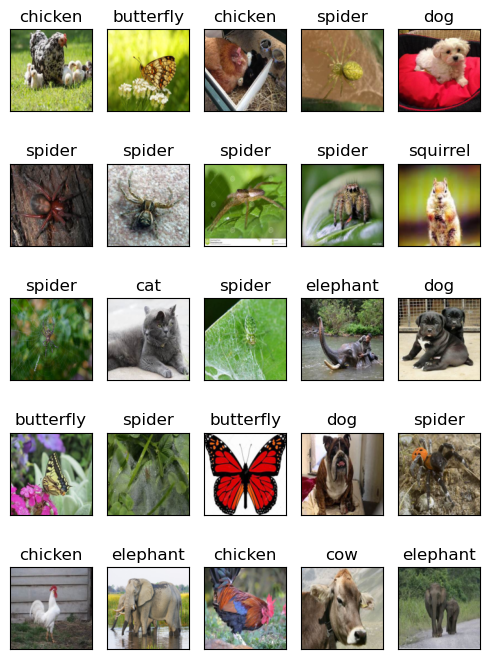

In [742]:
plt.figure(figsize=(5, 7))

for i in range(25):
    img, label = train_dataset[i]

    # Convert the image tensor to a numpy array
    img = np.clip(img, 0, 1)  # Ensure pixel values are within [0, 1]

    # Plot the image
    plt.subplot(5, 5, i + 1)  # 5x5 grid
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)    
    plt.imshow(img)  # Display the complete image
    plt.title(class_names[label])
    
plt.tight_layout()
plt.show()

In [709]:
#!pip install IPython

Model: "sequential_36"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_214 (Conv2D)             │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_51          │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_215 (Conv2D)             │ (None, 128, 128, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_52          │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_114               │ (None, 64, 64, 32)     │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_216 (Conv2D)             │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_53          │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_217 (Conv2D)             │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_54          │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_115               │ (None, 32, 32, 64)     │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_218 (Conv2D)             │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_55          │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_116               │ (None, 16, 16, 128)    │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_10     │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_41 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_51 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_42 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_52 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 158,506 (619.16 KB)

 Trainable params: 157,866 (616.66 KB)

 Non-trainable params: 640 (2.50 KB)

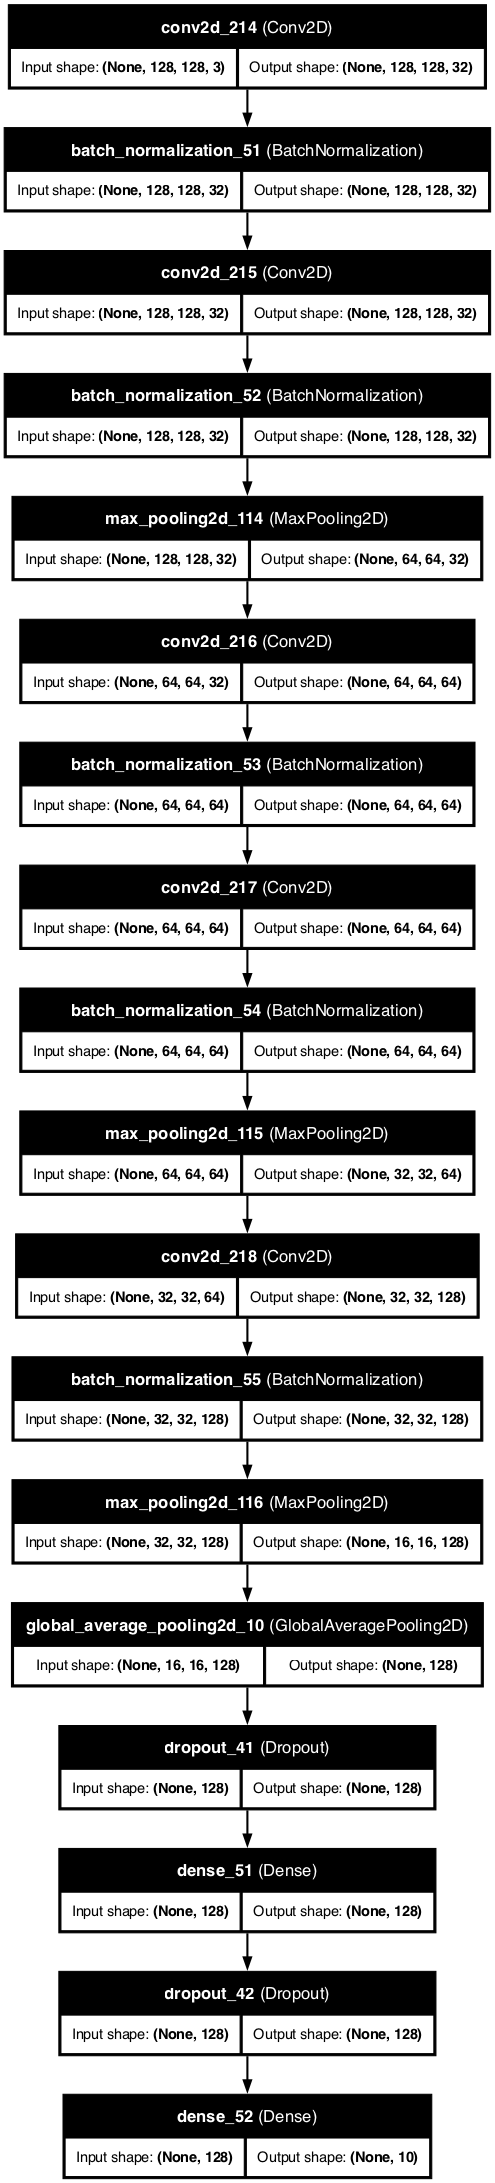

In [732]:
from tensorflow.keras.utils import plot_model
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Input, Conv2D, MaxPooling2D, BatchNormalization, Dropout, Dense, GlobalAveragePooling2D
)

def create_cnn_model():
    # Model / data parameters
    input_shape = (128, 128, 3)  # Size of Image 128x128
    num_classes = 10
    
    model = Sequential(
    [
        Input(shape=input_shape),
        
        # First block
        Conv2D(32, kernel_size=(3, 3), activation="relu", padding='same'),
        BatchNormalization(),  # Normalize activations to stabilize training
        Conv2D(32, kernel_size=(3, 3), activation="relu", padding='same'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),

        # Second block
        Conv2D(64, kernel_size=(3, 3), activation="relu", padding='same'),
        BatchNormalization(),
        Conv2D(64, kernel_size=(3, 3), activation="relu", padding='same'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),

        # Third block
        Conv2D(128, kernel_size=(3, 3), activation="relu", padding='same'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),

        # Global Average Pooling
        GlobalAveragePooling2D(),
        
        # Fully Connected Layers
        Dropout(0.1),  # Higher dropout rate for regularization
        Dense(128, activation="relu"),  # Additional dense layer with ReLU
        Dropout(0.5),  # Dropout for further regularization
        Dense(num_classes, activation="softmax"),
    ])

    return model

# Create and summarize the model
model = create_cnn_model()
model.summary()

# Visualize the model architecture
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True,  dpi=75, expand_nested=True )

In [744]:
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import math

# Calculate the steps per epoch and validation steps
train_steps = math.ceil(len(train_dataset) / train_loader.batch_size) # Number of batches in the training set
val_steps = math.ceil(len(val_dataset) / val_loader.batch_size) # Number of batches in the validation set

# Compile the model with the Adam optimizer, categorical crossentropy loss, and accuracy metric
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Configure EarlyStopping to stop training if validation loss doesn't improve for 5 epochs
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train without calling repeat()
history = model.fit(
    train_loader,
    validation_data=val_loader,
    epochs=12,
    steps_per_epoch=train_steps,
    validation_steps=val_steps,
    callbacks=[early_stopping]
)

Epoch 1/12
1855/1855 ━━━━━━━━━━━━━━━━━━━━ 245s 132ms/step - accuracy: 0.3332 - loss: 1.8942 - val_accuracy: 0.4123 - val_loss: 1.9113
Epoch 2/12
1855/1855 ━━━━━━━━━━━━━━━━━━━━ 242s 131ms/step - accuracy: 0.4802 - loss: 1.4893 - val_accuracy: 0.4517 - val_loss: 1.6686
Epoch 3/12
1855/1855 ━━━━━━━━━━━━━━━━━━━━ 242s 131ms/step - accuracy: 0.5593 - loss: 1.2791 - val_accuracy: 0.5118 - val_loss: 1.4857
Epoch 4/12
1855/1855 ━━━━━━━━━━━━━━━━━━━━ 244s 131ms/step - accuracy: 0.6145 - loss: 1.1356 - val_accuracy: 0.5663 - val_loss: 1.3394
Epoch 5/12
1855/1855 ━━━━━━━━━━━━━━━━━━━━ 245s 132ms/step - accuracy: 0.6481 - loss: 1.0434 - val_accuracy: 0.5350 - val_loss: 1.3718
Epoch 6/12
1855/1855 ━━━━━━━━━━━━━━━━━━━━ 249s 134ms/step - accuracy: 0.6738 - loss: 0.9654 - val_accuracy: 0.6213 - val_loss: 1.1855
Epoch 7/12
1855/1855 ━━━━━━━━━━━━━━━━━━━━ 236s 127ms/step - accuracy: 0.6992 - loss: 0.9059 - val_accuracy: 0.3754 - val_loss: 2.0387
Epoch 8/12
1855/1855 ━━━━━━━━━━━━━━━━━━━━ 235s 127ms/step - ac

## Evaluate the Model

328/328 ━━━━━━━━━━━━━━━━━━━━ 11s 33ms/step - accuracy: 0.7586 - loss: 0.7941
Validation Loss: 0.8091505169868469
Validation Accuracy: 0.7509549260139465
328/328 ━━━━━━━━━━━━━━━━━━━━ 11s 33ms/step
Len true_classes: 3927
Len predicted_classes: 3927
Classification Report:
              precision    recall  f1-score   support

        cane       0.79      0.73      0.76       701
     cavallo       0.75      0.67      0.71       422
    elefante       0.84      0.70      0.77       220
    farfalla       0.68      0.87      0.76       296
     gallina       0.85      0.78      0.82       486
       gatto       0.73      0.58      0.65       226
       mucca       0.72      0.58      0.65       289
      pecora       0.61      0.75      0.67       277
       ragno       0.74      0.94      0.83       720
  scoiattolo       0.80      0.62      0.70       290

    accuracy                           0.75      3927
   macro avg       0.75      0.72      0.73      3927
weighted avg       0.76   

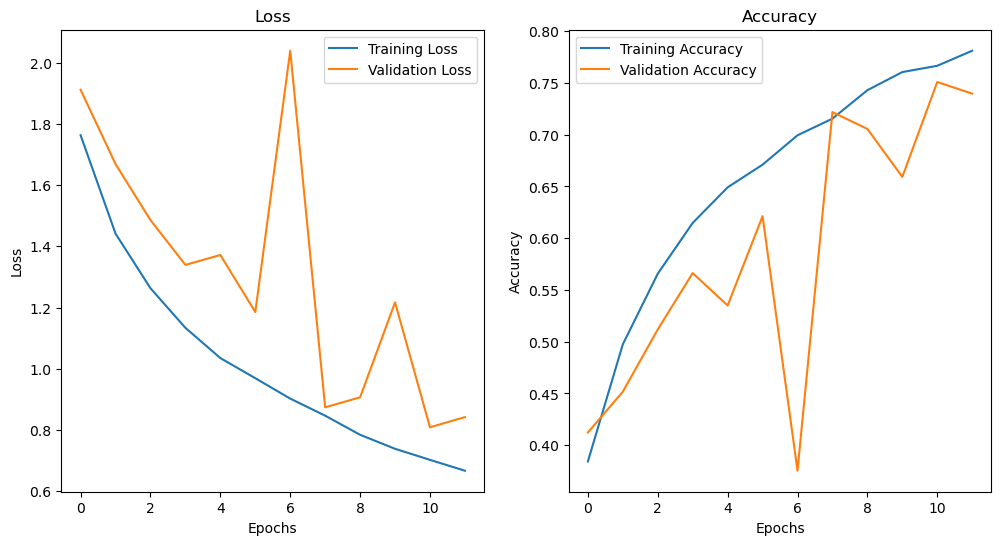

In [749]:
# Evaluate the model
val_loss, val_accuracy = model. evaluate(val_loader)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")

# Generate predictions
predictions = model. predict(val_loader)
predicted_classes = np. argmax(predictions, axis=1)

# Get true labels from val_loader
true_classes = []
for _, labels in val_loader:
    true_classes. extend(labels. numpy()) # Extract true labels

# Make sure lengths match
print(f"Len true_classes: {len(true_classes)}")
print(f"Len predicted_classes: {len(predicted_classes)}")

# Get class names from val_loader original dataset
class_labels = list(full_dataset.class_to_idx.keys())

# Generate classification report
print("Classification Report:")
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

# Confusion matrix
print("Confusion Matrix:")
conf_matrix = confusion_matrix(true_classes, predicted_classes)
print(conf_matrix)

# Visualize training history: Loss and Accuracy
plt.figure(figsize=(12, 6))

# Plot training and validation loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# Transfer Learning with a pre-trained model

In [756]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load the EfficientNetB0 pretrained model without the top layer (include_top=False)
def create_efficientnet_model(input_shape=(128, 128, 3), num_classes=10):
    base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=input_shape)
    base_model.trainable = False # Freeze pre-trained weights
    
    # Create the top of the model (head)
    model = Sequential([
        base_model,
        GlobalAveragePooling2D(), # Reduces spatial dimensions to a single vector
        Dropout(0.5),
        Dense(128, activation='relu'),
        Dense(num_classes, activation='softmax') # Output layer for 10 classes
    ])

    return model

# Create the model
model = create_efficientnet_model()
model.compile(optimizer=Adam(learning_rate=0.001),
loss='categorical_crossentropy',
metrics=['accuracy'])

# Model summary
model.summary()

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "sequential_37"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetb0 (Functional)     │ (None, 4, 4, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_11     │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_43 (Dropout)            │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_53 (Dense)                │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_54 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,214,829 (16.08 MB)

 Trainable params: 165,258 (645.54 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

### Transfer Learning - Training

In [760]:
datagen = ImageDataGenerator(
 rescale=1.0/255, # Normalize images to [0, 1]
 rotation_range=20,
 width_shift_range=0.2,
 height_shift_range=0.2,
 shear_range=0.2,
 zoom_range=0.2,
 horizontal_flip=True,
 validation_split=0.2 # 80% training, 20% validation
)

train_generator = datagen.flow_from_directory(
 file_path,
 target_size=(128, 128),
 batch_size=12,
 class_mode='categorical',
 subset='training'
)

val_generator = datagen.flow_from_directory(
 file_path,
 target_size=(128, 128),
 batch_size=12,
 class_mode='categorical',
 subset='validation'
)

# Train the model
history = model.fit(
 train_generator,
 epochs=12,
 validation_data=val_generator
)

Found 20948 images belonging to 10 classes.
Found 5232 images belonging to 10 classes.
Epoch 1/12


/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 323/1746 ━━━━━━━━━━━━━━━━━━━━ 1:16 54ms/step - accuracy: 0.1639 - loss: 2.2714

KeyboardInterrupt: 

## Fine Tunning

In [ ]:
base_model.trainable = True

model.compile(optimizer=Adam(learning_rate=1e-5), # Reduce the learning rate
 loss='categorical_crossentropy',
 metrics=['accuracy'])

history_fine = model.fit(train_generator, epochs=12, validation_data=val_generator)

## Evaluate the Selected Model

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(val_generator)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")

# Generate predictions
predictions = model.predict(val_generator)
predicted_classes = np.argmax(predictions, axis=1) # Select the classes with the highest probability

# Get real labels from the validation generator
true_classes = val_generator.classes # Direct access to the true labels
class_labels = list(val_generator.class_indices.keys()) # Class names

# Make sure the labels are true lengths match
print(f"Len true_classes: {len(true_classes)}")
print(f"Len predicted_classes: {len(predicted_classes)}")

# Generate the classification report
print("Classification Report:")
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

# Generate and display the confusion matrix
print("Confusion Matrix:")
conf_matrix = confusion_matrix(true_classes, predicted_classes)
print(conf_matrix)

# Visualize the confusion matrix as a heat map
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
plt.xticks(ticks=np.arange(len(class_labels)), labels=class_labels, rotation=45)
plt.yticks(ticks=np.arange(len(class_labels)), labels=class_labels)
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.tight_layout()
plt.show()

# View training history: Loss and Accuracy
plt.figure(figsize=(12, 6))

# Loss: training and validation
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy: training and validation
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()